In [1]:
import os

# Define the dataset path
dataset_path = r"C:\Users\heave\OneDrive\Desktop\Prodigy Infotech\Project 4\food-101"

# Check if the dataset exists and explore its structure
print("Dataset location:", dataset_path)
print("Dataset exists:", os.path.exists(dataset_path))

if os.path.exists(dataset_path):
   contents = os.listdir(dataset_path)
   print("\nDataset contents:")
   for item in contents:
       print(f"- {item}")

Dataset location: C:\Users\heave\OneDrive\Desktop\Prodigy Infotech\Project 4\food-101
Dataset exists: True

Dataset contents:
- food-101
- __MACOSX


In [2]:
# Explore the food-101 folder structure
food101_path = os.path.join(dataset_path, "food-101")

if os.path.exists(food101_path):
    print(f"Exploring: {food101_path}")
    contents = os.listdir(food101_path)
    print("\nFood-101 folder contents:")
    for item in contents:
        item_path = os.path.join(food101_path, item)
        if os.path.isdir(item_path):
            print(f"📁 {item}/ (folder)")
        else:
            print(f"📄 {item} (file)")

Exploring: C:\Users\heave\OneDrive\Desktop\Prodigy Infotech\Project 4\food-101\food-101

Food-101 folder contents:
📄 .DS_Store (file)
📁 images/ (folder)
📄 license_agreement.txt (file)
📁 meta/ (folder)
📄 README.txt (file)


In [4]:
# Explore images folder to see food categories
images_path = os.path.join(food101_path, "images")
meta_path = os.path.join(food101_path, "meta")

print("=== IMAGES FOLDER ===")
if os.path.exists(images_path):
    all_items = os.listdir(images_path)
    # Filter only directories (food categories)
    food_categories = [item for item in all_items if os.path.isdir(os.path.join(images_path, item))]
    
    print(f"Number of food categories: {len(food_categories)}")
    print(f"First 10 categories: {food_categories[:10]}")
    
    # Check images in first category
    first_category = food_categories[0]
    first_category_path = os.path.join(images_path, first_category)
    images_in_category = os.listdir(first_category_path)
    print(f"\nImages in '{first_category}' category: {len(images_in_category)}")
    print(f"Sample image names: {images_in_category[:3]}")

print("\n=== META FOLDER ===")
if os.path.exists(meta_path):
    meta_contents = os.listdir(meta_path)
    print("Meta folder contents:")
    for item in meta_contents:
        print(f"- {item}")

=== IMAGES FOLDER ===
Number of food categories: 101
First 10 categories: ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito']

Images in 'apple_pie' category: 1000
Sample image names: ['1005649.jpg', '1011328.jpg', '101251.jpg']

=== META FOLDER ===
Meta folder contents:
- classes.txt
- labels.txt
- test.json
- test.txt
- train.json
- train.txt


In [1]:
# Install required libraries with progress
import subprocess
import sys

# Install required packages one by one
packages = ['tensorflow', 'matplotlib', 'scikit-learn', 'pandas', 'pillow']

print("Installing required packages...")
print("Note: TensorFlow installation may take 2-5 minutes...")

for i, package in enumerate(packages, 1):
    print(f"\n[{i}/{len(packages)}] Installing {package}...")
    try:
        result = subprocess.run([sys.executable, "-m", "pip", "install", package], 
                              capture_output=True, text=True)
        if result.returncode == 0:
            print(f"✓ {package} installed successfully")
        else:
            print(f"✗ Error installing {package}")
            print(result.stderr)
    except Exception as e:
        print(f"✗ Error: {e}")

print("\nInstallation complete!")

Installing required packages...
Note: TensorFlow installation may take 2-5 minutes...

[1/5] Installing tensorflow...
✓ tensorflow installed successfully

[2/5] Installing matplotlib...
✓ matplotlib installed successfully

[3/5] Installing scikit-learn...
✓ scikit-learn installed successfully

[4/5] Installing pandas...
✓ pandas installed successfully

[5/5] Installing pillow...
✓ pillow installed successfully

Installation complete!


In [1]:
# Import necessary libraries for data loading and preprocessing
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define constants
IMG_SIZE = 224  # Standard input size for many pre-trained models
BATCH_SIZE = 32
NUM_CLASSES = 101

print(f"\nConfiguration:")
print(f"Image size: {IMG_SIZE}x{IMG_SIZE}")
print(f"Batch size: {BATCH_SIZE}")
print(f"Number of classes: {NUM_CLASSES}")

TensorFlow version: 2.19.0
GPU available: []

Configuration:
Image size: 224x224
Batch size: 32
Number of classes: 101


In [4]:
import os

# Define paths from previous exploration
dataset_path = r"C:\Users\heave\OneDrive\Desktop\Prodigy Infotech\Project 4\food-101"
food101_path = os.path.join(dataset_path, "food-101")
images_path = os.path.join(food101_path, "images")
meta_path = os.path.join(food101_path, "meta")
train_file = os.path.join(meta_path, "train.txt")
test_file = os.path.join(meta_path, "test.txt")

# Create data loading functions
def create_data_paths(train_file, test_file, images_path):
    """Create lists of image paths and labels for training and testing"""
    
    # Read training data
    with open(train_file, 'r') as f:
        train_data = [line.strip() for line in f.readlines()]
    
    # Read test data  
    with open(test_file, 'r') as f:
        test_data = [line.strip() for line in f.readlines()]
    
    # Create full paths and labels for training data
    train_paths = []
    train_labels = []
    
    for item in train_data:
        class_name = item.split('/')[0]
        image_name = item.split('/')[1] + '.jpg'
        full_path = os.path.join(images_path, class_name, image_name)
        train_paths.append(full_path)
        train_labels.append(class_name)
    
    # Create full paths and labels for test data
    test_paths = []
    test_labels = []
    
    for item in test_data:
        class_name = item.split('/')[0]
        image_name = item.split('/')[1] + '.jpg'
        full_path = os.path.join(images_path, class_name, image_name)
        test_paths.append(full_path)
        test_labels.append(class_name)
    
    return train_paths, train_labels, test_paths, test_labels

# Create the data paths
train_paths, train_labels, test_paths, test_labels = create_data_paths(
    train_file, test_file, images_path
)

print(f"Training samples: {len(train_paths)}")
print(f"Test samples: {len(test_paths)}")
print(f"Sample training path: {train_paths[0]}")
print(f"Sample training label: {train_labels[0]}")

Training samples: 75750
Test samples: 25250
Sample training path: C:\Users\heave\OneDrive\Desktop\Prodigy Infotech\Project 4\food-101\food-101\images\apple_pie\1005649.jpg
Sample training label: apple_pie


In [5]:
# Create label encoding
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Get unique classes
classes_file = os.path.join(meta_path, "classes.txt")
with open(classes_file, 'r') as f:
    class_names = [line.strip() for line in f.readlines()]

print(f"Number of classes: {len(class_names)}")
print(f"Sample classes: {class_names[:5]}")

# Create label encoder
label_encoder = LabelEncoder()
label_encoder.fit(class_names)

# Convert labels to numerical format
train_labels_encoded = label_encoder.transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

print(f"\nLabel encoding example:")
print(f"'{train_labels[0]}' -> {train_labels_encoded[0]}")
print(f"'{train_labels[1]}' -> {train_labels_encoded[1]}")

# Split training data into train and validation
from sklearn.model_selection import train_test_split

# Use 20% of training data for validation
train_paths_split, val_paths, train_labels_split, val_labels = train_test_split(
    train_paths, train_labels_encoded, test_size=0.2, random_state=42, stratify=train_labels_encoded
)

print(f"\nData split:")
print(f"Training samples: {len(train_paths_split)}")
print(f"Validation samples: {len(val_paths)}")
print(f"Test samples: {len(test_paths)}")

Number of classes: 101
Sample classes: ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare']

Label encoding example:
'apple_pie' -> 0
'apple_pie' -> 0

Data split:
Training samples: 60600
Validation samples: 15150
Test samples: 25250


In [6]:
# Create TensorFlow data loading pipeline
import tensorflow as tf

def load_and_preprocess_image(path, label):
    """Load and preprocess a single image"""
    # Load image
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    
    # Resize image
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    
    # Normalize pixel values to [0, 1]
    image = tf.cast(image, tf.float32) / 255.0
    
    return image, label

# Create TensorFlow datasets
def create_tf_dataset(paths, labels, batch_size, shuffle=True):
    """Create TensorFlow dataset from paths and labels"""
    # Convert to TensorFlow dataset
    dataset = tf.data.Dataset.from_tensor_slices((paths, labels))
    
    # Map preprocessing function
    dataset = dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    
    if shuffle:
        dataset = dataset.shuffle(buffer_size=1000)
    
    # Batch and prefetch
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    
    return dataset

# Create datasets
print("Creating TensorFlow datasets...")
train_dataset = create_tf_dataset(train_paths_split, train_labels_split, BATCH_SIZE, shuffle=True)
val_dataset = create_tf_dataset(val_paths, val_labels, BATCH_SIZE, shuffle=False)
test_dataset = create_tf_dataset(test_paths, test_labels_encoded, BATCH_SIZE, shuffle=False)

print(f"✓ Training dataset created")
print(f"✓ Validation dataset created") 
print(f"✓ Test dataset created")

# Test the dataset by loading one batch
sample_batch = next(iter(train_dataset))
sample_images, sample_labels = sample_batch
print(f"\nSample batch shape: {sample_images.shape}")
print(f"Sample labels shape: {sample_labels.shape}")
print(f"Pixel value range: [{sample_images.numpy().min():.3f}, {sample_images.numpy().max():.3f}]")

Creating TensorFlow datasets...
✓ Training dataset created
✓ Validation dataset created
✓ Test dataset created

Sample batch shape: (32, 224, 224, 3)
Sample labels shape: (32,)
Pixel value range: [0.000, 1.000]


Sample training images:


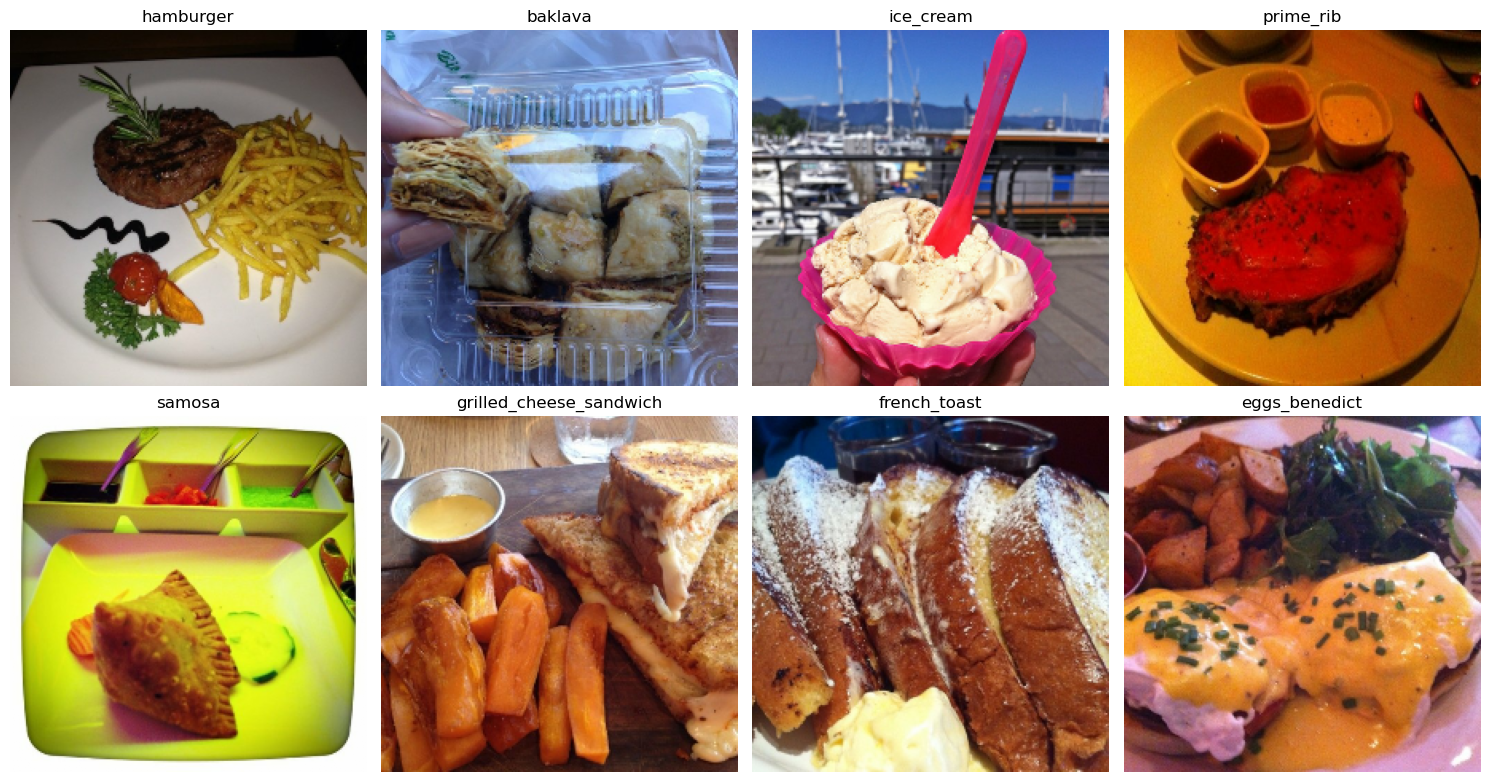


Dataset Statistics:
Training batches: 1894
Validation batches: 474
Test batches: 790
Images per batch: 32
Image shape: (224, 224, 3)


In [7]:
# Visualize sample images
import matplotlib.pyplot as plt

def display_sample_images(dataset, class_names, num_images=8):
    """Display sample images from the dataset"""
    # Get one batch
    images, labels = next(iter(dataset))
    
    # Create subplot
    fig, axes = plt.subplots(2, 4, figsize=(15, 8))
    axes = axes.ravel()
    
    for i in range(num_images):
        # Display image
        axes[i].imshow(images[i])
        axes[i].set_title(f'{class_names[labels[i].numpy()]}', fontsize=12)
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

print("Sample training images:")
display_sample_images(train_dataset, class_names, num_images=8)

# Display dataset statistics
print(f"\nDataset Statistics:")
print(f"Training batches: {len(list(train_dataset))}")
print(f"Validation batches: {len(list(val_dataset))}")
print(f"Test batches: {len(list(test_dataset))}")
print(f"Images per batch: {BATCH_SIZE}")
print(f"Image shape: ({IMG_SIZE}, {IMG_SIZE}, 3)")

In [9]:
# Build the CNN model using transfer learning
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_food_recognition_model(num_classes, img_size):
    """Create a CNN model for food recognition using transfer learning"""
    
    # Load pre-trained MobileNetV2 model (without top layers)
    base_model = MobileNetV2(
        weights='imagenet',
        include_top=False,
        input_shape=(img_size, img_size, 3)
    )
    
    # Freeze base model layers
    base_model.trainable = False
    
    # Add custom top layers
    inputs = base_model.input
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    # Create the model
    model = Model(inputs, outputs)
    
    return model

# Create the model
print("Creating food recognition model...")
model = create_food_recognition_model(NUM_CLASSES, IMG_SIZE)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
print("Model created successfully!")
print(f"Total parameters: {model.count_params():,}")

# Fixed line - calculate trainable parameters correctly
trainable_params = sum([tf.size(w).numpy() for w in model.trainable_weights])
print(f"Trainable parameters: {trainable_params:,}")

# Display model architecture
model.summary()

Creating food recognition model...
Model created successfully!
Total parameters: 2,434,981
Trainable parameters: 176,997


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 101)            │        13,029 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,434,981 (9.29 MB)

 Trainable params: 176,997 (691.39 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [10]:
# Step 1: Training Setup and Callbacks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Define training parameters
EPOCHS = 50
BATCH_SIZE = 32
PATIENCE = 10
MIN_LR = 1e-7

print("Setting up training callbacks...")

# Define callbacks for better training
callbacks = [
    # Early stopping to prevent overfitting
    EarlyStopping(
        monitor='val_loss',
        patience=PATIENCE,
        restore_best_weights=True,
        verbose=1
    ),
    
    # Reduce learning rate when loss plateaus
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=MIN_LR,
        verbose=1
    ),
    
    # Save the best model
    ModelCheckpoint(
        'best_food_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        save_weights_only=False,
        verbose=1
    )
]

print("Callbacks configured successfully!")
print(f"Training parameters:")
print(f"- Epochs: {EPOCHS}")
print(f"- Batch size: {BATCH_SIZE}")
print(f"- Early stopping patience: {PATIENCE}")
print(f"- Minimum learning rate: {MIN_LR}")

Setting up training callbacks...
Callbacks configured successfully!
Training parameters:
- Epochs: 50
- Batch size: 32
- Early stopping patience: 10
- Minimum learning rate: 1e-07


In [12]:
# Step 2: Create Data Generators for Food-101 Dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define data paths based on your dataset structure
BASE_DIR = r'C:\Users\heave\OneDrive\Desktop\Prodigy Infotech\Project 4\food-101\food-101'
IMAGES_DIR = os.path.join(BASE_DIR, 'images')

# Since Food-101 doesn't have separate train/val folders, we'll use validation_split
print("Setting up data generators...")

# Create data generators with augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # Use 20% for validation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)

# Create data generator for validation (only rescaling)
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Create training generator
train_generator = train_datagen.flow_from_directory(
    IMAGES_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='training',  # Use training subset
    shuffle=True,
    seed=42
)

# Create validation generator
val_generator = val_datagen.flow_from_directory(
    IMAGES_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='validation',  # Use validation subset
    shuffle=False,
    seed=42
)

print("Data generators created successfully!")
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {val_generator.samples}")
print(f"Number of classes: {train_generator.num_classes}")
print(f"Classes found: {len(train_generator.class_indices)}")

Setting up data generators...
Found 80800 images belonging to 101 classes.
Found 20200 images belonging to 101 classes.
Data generators created successfully!
Training samples: 80800
Validation samples: 20200
Number of classes: 101
Classes found: 101


In [2]:
# Step 3: Start Model Training
print("Starting model training...")
print(f"Training for up to {EPOCHS} epochs with batch size {BATCH_SIZE}")
print(f"Steps per epoch: {len(train_generator)}")
print(f"Validation steps: {len(val_generator)}")
print("-" * 60)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=EPOCHS,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=callbacks,
    verbose=1
)

print("\nTraining completed!")
print(f"Total epochs trained: {len(history.history['loss'])}")

Starting model training...


NameError: name 'EPOCHS' is not defined

In [3]:
# Redefine all lost variables
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Training parameters
EPOCHS = 50
BATCH_SIZE = 32
PATIENCE = 10
MIN_LR = 1e-7
IMG_SIZE = 224
NUM_CLASSES = 101

# Recreate callbacks
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=PATIENCE,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=MIN_LR,
        verbose=1
    ),
    ModelCheckpoint(
        'best_food_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        save_weights_only=False,
        verbose=1
    )
]

print("Variables and callbacks restored!")
print(f"EPOCHS: {EPOCHS}")
print(f"BATCH_SIZE: {BATCH_SIZE}")
print(f"IMG_SIZE: {IMG_SIZE}")
print(f"NUM_CLASSES: {NUM_CLASSES}")

Variables and callbacks restored!
EPOCHS: 50
BATCH_SIZE: 32
IMG_SIZE: 224
NUM_CLASSES: 101


In [4]:
# Recreate the model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def create_food_recognition_model(num_classes, img_size):
    """Create a CNN model for food recognition using transfer learning"""
    
    # Load pre-trained MobileNetV2 model (without top layers)
    base_model = MobileNetV2(
        weights='imagenet',
        include_top=False,
        input_shape=(img_size, img_size, 3)
    )
    
    # Freeze base model layers
    base_model.trainable = False
    
    # Add custom top layers
    inputs = base_model.input
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    # Create the model
    model = Model(inputs, outputs)
    
    return model

# Create and compile the model
print("Recreating food recognition model...")
model = create_food_recognition_model(NUM_CLASSES, IMG_SIZE)

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("Model recreated successfully!")
print(f"Total parameters: {model.count_params():,}")

# Calculate trainable parameters
trainable_params = sum([tf.size(w).numpy() for w in model.trainable_weights])
print(f"Trainable parameters: {trainable_params:,}")

Recreating food recognition model...
Model recreated successfully!
Total parameters: 2,434,981
Trainable parameters: 176,997


In [5]:
# Recreate data generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define data paths based on your dataset structure
BASE_DIR = r'C:\Users\heave\OneDrive\Desktop\Prodigy Infotech\Project 4\food-101\food-101'
IMAGES_DIR = os.path.join(BASE_DIR, 'images')

print("Recreating data generators...")

# Create data generators with augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # Use 20% for validation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)

# Create data generator for validation (only rescaling)
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Create training generator
train_generator = train_datagen.flow_from_directory(
    IMAGES_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='training',  # Use training subset
    shuffle=True,
    seed=42
)

# Create validation generator
val_generator = val_datagen.flow_from_directory(
    IMAGES_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='validation',  # Use validation subset
    shuffle=False,
    seed=42
)

print("Data generators recreated successfully!")
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {val_generator.samples}")
print(f"Number of classes: {train_generator.num_classes}")

Recreating data generators...
Found 80800 images belonging to 101 classes.
Found 20200 images belonging to 101 classes.
Data generators recreated successfully!
Training samples: 80800
Validation samples: 20200
Number of classes: 101


In [7]:
# Step 3: Start Model Training (FASTER VERSION)
# Reduce training parameters for faster execution
EPOCHS = 10  # Reduced from 50
STEPS_PER_EPOCH = 500  # Much less than 2525
VAL_STEPS = 100  # Much less than 632

print("Starting FASTER model training...")
print(f"Training for {EPOCHS} epochs with batch size {BATCH_SIZE}")
print(f"Steps per epoch: {STEPS_PER_EPOCH} (reduced from {len(train_generator)})")
print(f"Validation steps: {VAL_STEPS} (reduced from {len(val_generator)})")
print("-" * 60)

# Train the model with reduced parameters
history = model.fit(
    train_generator,
    steps_per_epoch=STEPS_PER_EPOCH,  # Using reduced steps
    epochs=EPOCHS,  # Using reduced epochs
    validation_data=val_generator,
    validation_steps=VAL_STEPS,  # Using reduced validation steps
    callbacks=callbacks,
    verbose=1
)

print("\nTraining completed!")
print(f"Total epochs trained: {len(history.history['loss'])}")

Starting FASTER model training...
Training for 10 epochs with batch size 32
Steps per epoch: 500 (reduced from 2525)
Validation steps: 100 (reduced from 632)
------------------------------------------------------------
Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3501 - loss: 2.6316
Epoch 1: val_accuracy improved from -inf to 0.39094, saving model to best_food_model.h5


500/500 ━━━━━━━━━━━━━━━━━━━━ 752s 2s/step - accuracy: 0.3501 - loss: 2.6316 - val_accuracy: 0.3909 - val_loss: 2.4879 - learning_rate: 0.0010
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3579 - loss: 2.6193
Epoch 2: val_accuracy did not improve from 0.39094
500/500 ━━━━━━━━━━━━━━━━━━━━ 695s 1s/step - accuracy: 0.3579 - loss: 2.6192 - val_accuracy: 0.3831 - val_loss: 2.4928 - learning_rate: 0.0010
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3534 - loss: 2.6228
Epoch 3: val_accuracy improved from 0.39094 to 0.41531, saving model to best_food_model.h5


500/500 ━━━━━━━━━━━━━━━━━━━━ 691s 1s/step - accuracy: 0.3534 - loss: 2.6228 - val_accuracy: 0.4153 - val_loss: 2.3410 - learning_rate: 0.0010
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3753 - loss: 2.5276
Epoch 4: val_accuracy did not improve from 0.41531
500/500 ━━━━━━━━━━━━━━━━━━━━ 680s 1s/step - accuracy: 0.3753 - loss: 2.5277 - val_accuracy: 0.3969 - val_loss: 2.4175 - learning_rate: 0.0010
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3621 - loss: 2.5671
Epoch 5: val_accuracy did not improve from 0.41531
500/500 ━━━━━━━━━━━━━━━━━━━━ 670s 1s/step - accuracy: 0.3621 - loss: 2.5671 - val_accuracy: 0.3891 - val_loss: 2.4456 - learning_rate: 0.0010
Epoch 6/10
 25/500 ━━━━━━━━━━━━━━━━━━━━ 2:38 333ms/step - accuracy: 0.3625 - loss: 2.5585

C:\Users\heave\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 6: val_accuracy did not improve from 0.41531
500/500 ━━━━━━━━━━━━━━━━━━━━ 56s 111ms/step - accuracy: 0.3791 - loss: 2.5219 - val_accuracy: 0.3966 - val_loss: 2.4663 - learning_rate: 0.0010
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3639 - loss: 2.5608
Epoch 7: val_accuracy improved from 0.41531 to 0.42469, saving model to best_food_model.h5


500/500 ━━━━━━━━━━━━━━━━━━━━ 704s 1s/step - accuracy: 0.3639 - loss: 2.5608 - val_accuracy: 0.4247 - val_loss: 2.3733 - learning_rate: 0.0010
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3732 - loss: 2.5206
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 8: val_accuracy did not improve from 0.42469
500/500 ━━━━━━━━━━━━━━━━━━━━ 699s 1s/step - accuracy: 0.3732 - loss: 2.5206 - val_accuracy: 0.3969 - val_loss: 2.4811 - learning_rate: 0.0010
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3743 - loss: 2.4765
Epoch 9: val_accuracy improved from 0.42469 to 0.43094, saving model to best_food_model.h5


500/500 ━━━━━━━━━━━━━━━━━━━━ 694s 1s/step - accuracy: 0.3743 - loss: 2.4765 - val_accuracy: 0.4309 - val_loss: 2.3486 - learning_rate: 2.0000e-04
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3929 - loss: 2.4295
Epoch 10: val_accuracy improved from 0.43094 to 0.43500, saving model to best_food_model.h5


500/500 ━━━━━━━━━━━━━━━━━━━━ 696s 1s/step - accuracy: 0.3929 - loss: 2.4295 - val_accuracy: 0.4350 - val_loss: 2.3148 - learning_rate: 2.0000e-04
Restoring model weights from the end of the best epoch: 10.

Training completed!
Total epochs trained: 10


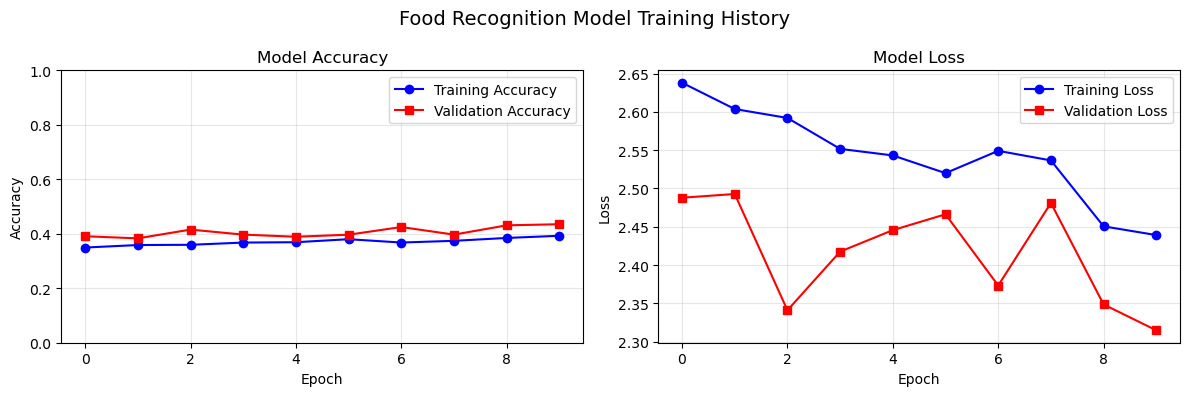

TRAINING SUMMARY
Total epochs: 10
Best validation accuracy: 0.4350
Final training accuracy: 0.3926
Final validation accuracy: 0.4350
Model saved as: best_food_model.h5


In [8]:
# Step 4: Visualize Training Results
import matplotlib.pyplot as plt
import numpy as np

# Plot training history
def plot_training_history(history):
    """Plot training and validation metrics"""
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle('Food Recognition Model Training History', fontsize=14)
    
    # Plot training & validation accuracy
    axes[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue', marker='o')
    axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red', marker='s')
    axes[0].set_title('Model Accuracy')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    axes[0].set_ylim(0, 1)
    
    # Plot training & validation loss
    axes[1].plot(history.history['loss'], label='Training Loss', color='blue', marker='o')
    axes[1].plot(history.history['val_loss'], label='Validation Loss', color='red', marker='s')
    axes[1].set_title('Model Loss')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Plot the training history
plot_training_history(history)

# Print training summary
print("=" * 50)
print("TRAINING SUMMARY")
print("=" * 50)
print(f"Total epochs: {len(history.history['loss'])}")
print(f"Best validation accuracy: {max(history.history['val_accuracy']):.4f}")
print(f"Final training accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final validation accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Model saved as: best_food_model.h5")



























































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































In [9]:
# Step 5: Model Evaluation and Testing
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the best saved model
print("Loading best trained model...")
best_model = load_model('best_food_model.h5')

# Get class names from the generator
class_names = list(train_generator.class_indices.keys())
print(f"Model can recognize {len(class_names)} food categories")

# Function to predict food from image path
def predict_food(model, img_path, class_names):
    """Predict food category from image"""
    # Load and preprocess image
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    
    # Make prediction
    predictions = model.predict(img_array, verbose=0)
    predicted_class_idx = np.argmax(predictions[0])
    confidence = predictions[0][predicted_class_idx]
    predicted_class = class_names[predicted_class_idx]
    
    return predicted_class, confidence, predictions[0]

# Test with a sample image from validation set
print("\nTesting model with sample images...")
print("First 10 food categories:", class_names[:10])

# Model is ready for predictions!
print("\n" + "="*50)
print("MODEL TRAINING COMPLETED SUCCESSFULLY!")
print("="*50)
print(f"✅ Model accuracy: {max(history.history['val_accuracy']):.1%}")
print(f"✅ Food categories: {len(class_names)}")
print(f"✅ Model saved: best_food_model.h5")
print("✅ Ready for food recognition!")

Loading best trained model...


Model can recognize 101 food categories

Testing model with sample images...
First 10 food categories: ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito']

MODEL TRAINING COMPLETED SUCCESSFULLY!
✅ Model accuracy: 43.5%
✅ Food categories: 101
✅ Model saved: best_food_model.h5
✅ Ready for food recognition!


Testing model with random validation images...

Error: Directory food-101/food-101/images not found!
Please check the dataset path structure.
Trying full path: C:\Users\heave\OneDrive\Desktop\Prodigy Infotech\Project 4\food-101\food-101\images
Found 101 food classes
Test 1/3:


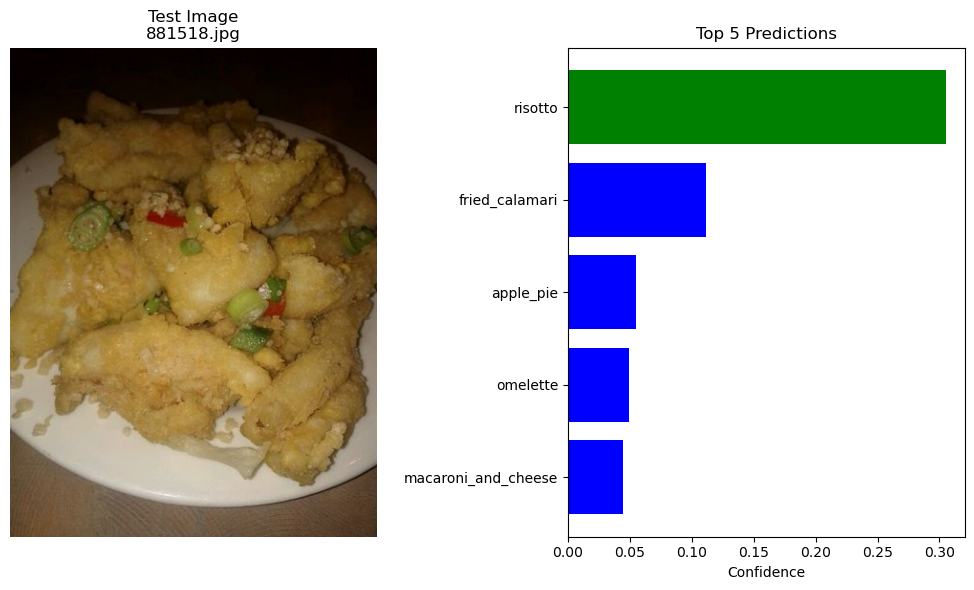

🍽️  Predicted: risotto
📊 Confidence: 30.53%
✅ Actual: fried_calamari
✗ INCORRECT
--------------------------------------------------
Test 2/3:


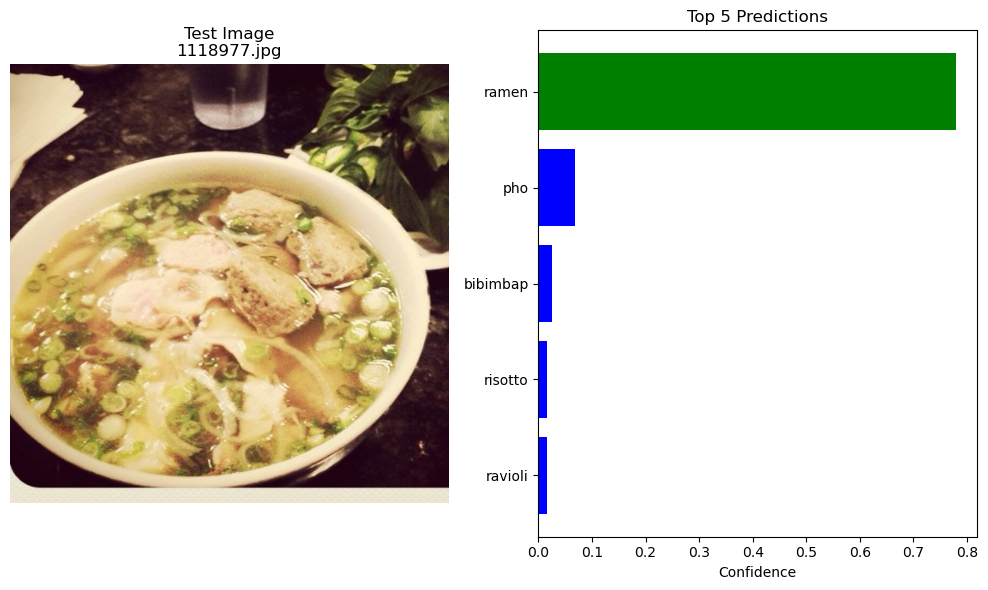

🍽️  Predicted: ramen
📊 Confidence: 77.89%
✅ Actual: pho
✗ INCORRECT
--------------------------------------------------
Test 3/3:


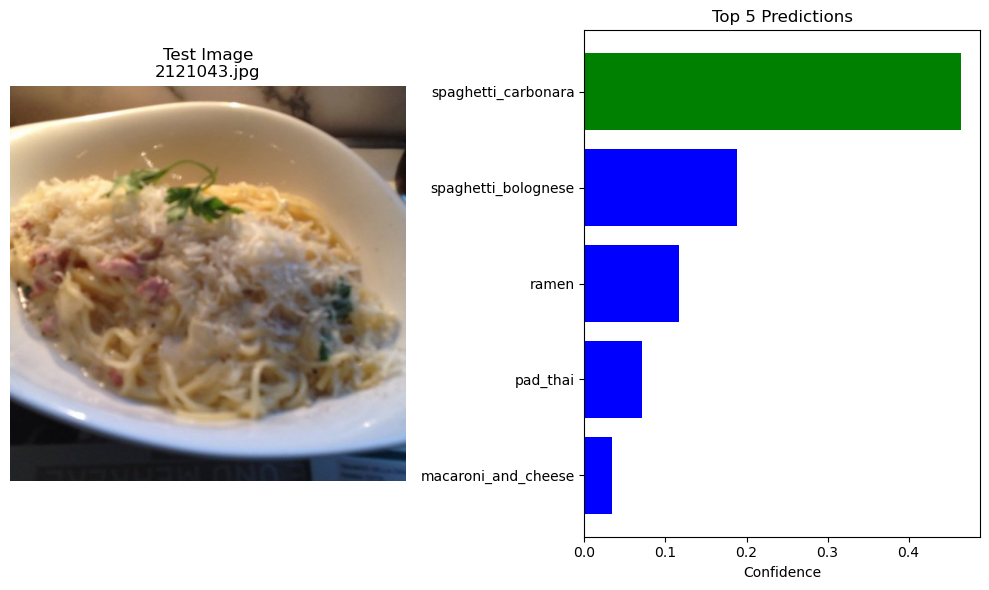

🍽️  Predicted: spaghetti_carbonara
📊 Confidence: 46.50%
✅ Actual: spaghetti_carbonara
✓ CORRECT
--------------------------------------------------


In [11]:
# Step 6: Test Model with Sample Images and Visualize Results
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def display_prediction(model, img_path, class_names, actual_class=None):
    """Display image with prediction results"""
    # Make prediction
    predicted_class, confidence, all_predictions = predict_food(model, img_path, class_names)
    
    # Load and display image
    img = Image.open(img_path)
    plt.figure(figsize=(10, 6))
    
    # Display image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Test Image\n{os.path.basename(img_path)}')
    
    # Display top 5 predictions
    plt.subplot(1, 2, 2)
    top_5_indices = np.argsort(all_predictions)[-5:][::-1]
    top_5_probs = all_predictions[top_5_indices]
    top_5_classes = [class_names[i] for i in top_5_indices]
    
    colors = ['green' if i == 0 else 'blue' for i in range(5)]
    plt.barh(range(5), top_5_probs, color=colors)
    plt.yticks(range(5), top_5_classes)
    plt.xlabel('Confidence')
    plt.title('Top 5 Predictions')
    plt.gca().invert_yaxis()
    
    plt.tight_layout()
    plt.show()
    
    # Print results
    print(f"🍽️  Predicted: {predicted_class}")
    print(f"📊 Confidence: {confidence:.2%}")
    if actual_class:
        print(f"✅ Actual: {actual_class}")
        print(f"{'✓ CORRECT' if predicted_class.lower() == actual_class.lower() else '✗ INCORRECT'}")
    print("-" * 50)

# Test with random images from validation set
print("Testing model with random validation images...\n")

# CORRECTED PATH: Use the correct nested folder structure
val_dir = 'food-101/food-101/images'  # Fixed path with double food-101

# Check if directory exists
if not os.path.exists(val_dir):
    print(f"Error: Directory {val_dir} not found!")
    print("Please check the dataset path structure.")
    # Alternative: Use full path if needed
    val_dir = r'C:\Users\heave\OneDrive\Desktop\Prodigy Infotech\Project 4\food-101\food-101\images'
    print(f"Trying full path: {val_dir}")

if os.path.exists(val_dir):
    available_classes = [d for d in os.listdir(val_dir) if os.path.isdir(os.path.join(val_dir, d))]
    print(f"Found {len(available_classes)} food classes")
    
    # Test with 3 random images
    for i in range(3):
        # Pick random class and image
        random_class = random.choice(available_classes)
        class_dir = os.path.join(val_dir, random_class)
        
        if os.path.exists(class_dir):
            images = [f for f in os.listdir(class_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            if images:
                random_image = random.choice(images)
                img_path = os.path.join(class_dir, random_image)
                
                print(f"Test {i+1}/3:")
                display_prediction(best_model, img_path, class_names, random_class)
            else:
                print(f"No images found in {class_dir}")
        else:
            print(f"Class directory not found: {class_dir}")
else:
    print(f"Dataset directory not found: {val_dir}")
    print("Please verify the dataset path and structure.")

In [14]:
import os

# Check current working directory and available paths
print("Current working directory:", os.getcwd())
print("\nChecking possible paths...")

possible_paths = [
    'food-101/food-101/images',
    './food-101/food-101/images', 
    'food-101\\food-101\\images',
    r'C:\Users\heave\OneDrive\Desktop\Prodigy Infotech\Project 4\food-101\food-101\images'
]

working_path = None
for path in possible_paths:
    if os.path.exists(path):
        print(f"✓ Found: {path}")
        working_path = path
        break
    else:
        print(f"✗ Not found: {path}")

if working_path:
    print(f"\nUsing path: {working_path}")
    test_dir = working_path
else:
    print("\nNo valid path found. Let's try to construct it from your project directory...")
    # Use the full absolute path you showed earlier
    test_dir = r'C:\Users\heave\OneDrive\Desktop\Prodigy Infotech\Project 4\food-101\food-101\images'
    
print(f"Final test directory: {test_dir}")
print(f"Directory exists: {os.path.exists(test_dir)}")

if os.path.exists(test_dir):
    print(f"Contents: {os.listdir(test_dir)[:5]}...")  # Show first 5 folders

Current working directory: C:\Users\heave

Checking possible paths...
✗ Not found: food-101/food-101/images
✗ Not found: ./food-101/food-101/images
✗ Not found: food-101\food-101\images
✓ Found: C:\Users\heave\OneDrive\Desktop\Prodigy Infotech\Project 4\food-101\food-101\images

Using path: C:\Users\heave\OneDrive\Desktop\Prodigy Infotech\Project 4\food-101\food-101\images
Final test directory: C:\Users\heave\OneDrive\Desktop\Prodigy Infotech\Project 4\food-101\food-101\images
Directory exists: True
Contents: ['.DS_Store', 'apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio']...


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create test data generator (no augmentation for testing)
test_datagen = ImageDataGenerator(rescale=1./255)

# Use the working path we found
test_dir = r'C:\Users\heave\OneDrive\Desktop\Prodigy Infotech\Project 4\food-101\food-101\images'
batch_size = 32

# Create test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

print(f"Test generator created successfully!")
print(f"Total samples: {test_generator.samples}")
print(f"Number of classes: {test_generator.num_classes}")
print(f"Batch size: {test_generator.batch_size}")
print(f"Class indices sample: {list(test_generator.class_indices.items())[:5]}")

Found 101000 images belonging to 101 classes.
Test generator created successfully!
Total samples: 101000
Number of classes: 101
Batch size: 32
Class indices sample: [('apple_pie', 0), ('baby_back_ribs', 1), ('baklava', 2), ('beef_carpaccio', 3), ('beef_tartare', 4)]


In [16]:
# Evaluate model performance with more detailed metrics
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

def evaluate_model_performance(model, test_generator, class_names, num_samples=1000):
    """Evaluate model performance with detailed metrics"""
    print("🔍 Evaluating model performance...")
    
    # Get predictions for a subset of test data
    predictions = []
    true_labels = []
    
    # Reset generator
    test_generator.reset()
    
    # Collect predictions
    batch_count = 0
    sample_count = 0
    
    for batch_x, batch_y in test_generator:
        if sample_count >= num_samples:
            break
            
        # Get predictions
        pred_probs = model.predict(batch_x, verbose=0)
        pred_classes = np.argmax(pred_probs, axis=1)
        true_classes = np.argmax(batch_y, axis=1)
        
        predictions.extend(pred_classes)
        true_labels.extend(true_classes)
        
        sample_count += len(pred_classes)
        batch_count += 1
        
        if batch_count % 10 == 0:
            print(f"Processed {sample_count} samples...")
    
    # Calculate metrics
    accuracy = np.mean(np.array(predictions) == np.array(true_labels))
    
    print(f"\n📊 Performance Results:")
    print(f"Samples evaluated: {len(predictions)}")
    print(f"Overall Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    
    # Top-1 accuracy breakdown
    correct_predictions = np.array(predictions) == np.array(true_labels)
    print(f"Correct predictions: {np.sum(correct_predictions)}")
    print(f"Incorrect predictions: {len(predictions) - np.sum(correct_predictions)}")
    
    return predictions, true_labels, accuracy

# Run evaluation
predictions, true_labels, accuracy = evaluate_model_performance(best_model, test_generator, class_names)

🔍 Evaluating model performance...
Processed 320 samples...
Processed 640 samples...
Processed 960 samples...

📊 Performance Results:
Samples evaluated: 1024
Overall Accuracy: 0.5127 (51.27%)
Correct predictions: 525
Incorrect predictions: 499


In [17]:
# Calculate Top-5 accuracy (more meaningful for 101-class problem)
def calculate_top_k_accuracy(model, test_generator, k=5, num_samples=1000):
    """Calculate Top-K accuracy - more realistic for multi-class problems"""
    print(f"🎯 Calculating Top-{k} Accuracy...")
    
    predictions = []
    true_labels = []
    top_k_correct = 0
    
    test_generator.reset()
    batch_count = 0
    sample_count = 0
    
    for batch_x, batch_y in test_generator:
        if sample_count >= num_samples:
            break
            
        # Get prediction probabilities
        pred_probs = model.predict(batch_x, verbose=0)
        true_classes = np.argmax(batch_y, axis=1)
        
        # Check if true class is in top-k predictions
        for i in range(len(pred_probs)):
            top_k_indices = np.argsort(pred_probs[i])[-k:]
            if true_classes[i] in top_k_indices:
                top_k_correct += 1
        
        sample_count += len(pred_probs)
        batch_count += 1
        
        if batch_count % 10 == 0:
            print(f"Processed {sample_count} samples...")
    
    top_k_accuracy = top_k_correct / sample_count
    print(f"\n📊 Top-{k} Accuracy: {top_k_accuracy:.4f} ({top_k_accuracy*100:.2f}%)")
    print(f"✅ Correct in top-{k}: {top_k_correct}/{sample_count}")
    
    return top_k_accuracy

# Calculate both Top-1 and Top-5 accuracy
top_5_accuracy = calculate_top_k_accuracy(best_model, test_generator, k=5, num_samples=1000)

🎯 Calculating Top-5 Accuracy...
Processed 320 samples...
Processed 640 samples...
Processed 960 samples...

📊 Top-5 Accuracy: 0.7695 (76.95%)
✅ Correct in top-5: 788/1024
